In [1]:
import matplotlib.pyplot as plt
import random
import torch

In [2]:
#用带有噪声的线性模型构造一个人造数据集
def synthetic_data(w,b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))
true_w = torch.tensor([2, -3.4], dtype=torch.float)
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0],'\nlabels:', labels[0])

features: tensor([1.1256, 1.3771]) 
labels: tensor([1.7464])


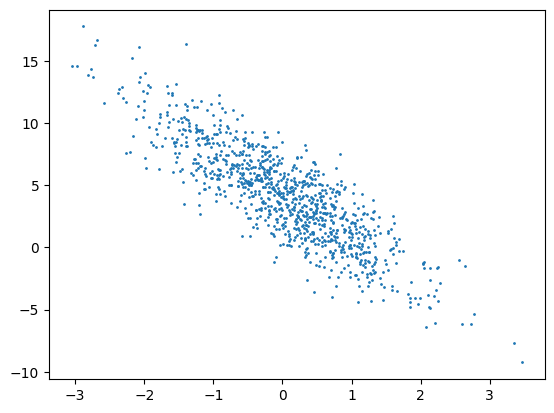

In [4]:
#设置图片大小
# plt.figure(figsize=(10, 8), dpi=60)
plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(),1)

In [5]:
#yield : python的一个iterator，每次调用一次iteration，返回一些信息。
#定义一个data_iter函数，该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    #shuffle函数：随机读取样本
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X,y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.0824, -0.2465],
        [ 0.8011,  0.7516],
        [ 0.7868, -0.9924],
        [ 0.7927, -0.0985],
        [ 1.1988, -0.6796],
        [-1.8386,  0.0983],
        [ 0.2557, -0.2475],
        [-0.9681, -1.2243],
        [ 0.1633,  0.9943],
        [-0.9719,  0.4529]]) 
 tensor([[4.8697],
        [3.2487],
        [9.1362],
        [6.1128],
        [8.9062],
        [0.1786],
        [5.5661],
        [6.4291],
        [1.1499],
        [0.7084]])


In [6]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def linreg(X, w, b):
    #线性回归模型
    return torch.matmul(X, w) + b

In [7]:
#定义损失函数
def squared_loss(y_hat, y):
    #均方损失
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [8]:
#定义优化算法sgd = stochastic gradient descent
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [9]:
#训练过程
lr = 0.03
num_epochs = 30
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    #对数据扫
    for X,y in data_iter(batch_size, features, labels):
        #计算w, b的梯度
        l = loss(net(X, w, b), y) #X'和y’的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w,b], lr, batch_size) #使用参数的梯度更新参数
    #评价训练进度，把整个数据和预测做一下损失
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1},loss {float(train_l.mean()):f}')
  

epoch 1,loss 0.038887
epoch 2,loss 0.000147
epoch 3,loss 0.000053
epoch 4,loss 0.000052
epoch 5,loss 0.000052
epoch 6,loss 0.000052
epoch 7,loss 0.000052
epoch 8,loss 0.000052
epoch 9,loss 0.000052
epoch 10,loss 0.000052
epoch 11,loss 0.000052
epoch 12,loss 0.000052
epoch 13,loss 0.000052
epoch 14,loss 0.000052
epoch 15,loss 0.000052
epoch 16,loss 0.000052
epoch 17,loss 0.000052
epoch 18,loss 0.000052
epoch 19,loss 0.000052
epoch 20,loss 0.000052
epoch 21,loss 0.000052
epoch 22,loss 0.000052
epoch 23,loss 0.000052
epoch 24,loss 0.000052
epoch 25,loss 0.000052
epoch 26,loss 0.000052
epoch 27,loss 0.000052
epoch 28,loss 0.000052
epoch 29,loss 0.000052
epoch 30,loss 0.000052


In [10]:
print(f'w的误差为 {true_w - w.reshape(true_w.shape)}')
print(f'b的误差为{true_b - b}')

w的误差为 tensor([ 0.0001, -0.0005], grad_fn=<SubBackward0>)
b的误差为tensor([-0.0009], grad_fn=<RsubBackward1>)
